In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 100, 50
xmin, xmax = -3.0, 7.0
ymin, ymax = -2.5, 2.5

# Define cell-centered variable names
center_vars   = ['pres', 'divv']
face_vars     = ['velc', 'hvar', 'ibmf']

ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = dict(tmax = 10, 
                     dt = 0.01, 
                     Re = 100.0)

simulation_info = dict(time_stepping = 'ab2', 
                       poisson_solver = 'serial_direct', 
                       maxiter = 2000,
                       tol = 1e-10, with_ib = True)

particle_info = [dict(xo = [0.0,  1.0], radius = 0.5, vel = [0.0, 0.0]),
                 dict(xo = [0.0, -1.0], radius = 0.5, vel = [0.0, 0.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(pres = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(pres = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'outflow', 'dirichlet', 'neumann'])
bc_val_facex  = dict(velc = [1.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc =[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.set_initial_velocity(gridc, gridx, gridy, 'velc', 'pres')

------------ Time = 0.01 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.00965413680732e-11
Max, Min, U   : 1.4735541875342946, -1.1521973275786148
Max, Min, V   : 0.43837208223360663, -0.43837208223360624
Max, Min, P   : 34.08218345320911, -21.285621309456317
Max, Min, DIV : 5.5289106626332796e-14, -4.6601611458640946e-14


------------ Time = 0.02 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6732590928658e-11
Max, Min, U   : 1.7418629078560215, -1.2093040827471813
Max, Min, V   : 0.6916881858457873, -0.691402172371988
Max, Min, P   : 21.500715167874674, -13.307410120647763
Max, Min, DIV : 3.441691376337985e-14, -3.175237850427948e-14


------------ Time = 0.03 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2162241592304224e-11
Max, Min, U   : 1.9328107367512724, -1.2407167836360822
Max, Min, V   : 0.8541986716719536, -0.8539896488431828
Max, Min, P   : 13.37875250593098, -8.89909

------------ Time = 0.25000000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8556343077553145e-12
Max, Min, U   : 2.0393884799977755, -1.0
Max, Min, V   : 1.1485593359245059, -1.1435953735401456
Max, Min, P   : 0.9526599153300108, -2.233926558298718
Max, Min, DIV : 3.774758283725532e-15, -3.552713678800501e-15


------------ Time = 0.26000000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.871905639057183e-12
Max, Min, U   : 2.0407524262742243, -1.0
Max, Min, V   : 1.1480945379816214, -1.1429516292115598
Max, Min, P   : 0.934295146232495, -2.2469701661043873
Max, Min, DIV : 3.3306690738754696e-15, -2.7755575615628914e-15


------------ Time = 0.2700000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8322257292047587e-12
Max, Min, U   : 2.040595025520065, -1.0
Max, Min, V   : 1.147729126042486, -1.1424072458469434
Max, Min, P   : 0.9614741290977186, -2.21459

------------ Time = 0.48000000000000026 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7779670477960514e-12
Max, Min, U   : 2.046097248132775, -1.0
Max, Min, V   : 1.1385088837992101, -1.1300287009158503
Max, Min, P   : 1.1589944552076965, -1.9318692852551929
Max, Min, DIV : 3.774758283725532e-15, -5.551115123125783e-15


------------ Time = 0.49000000000000027 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5663503884321474e-12
Max, Min, U   : 2.0452179507497013, -1.0
Max, Min, V   : 1.1374379530957006, -1.128837008594884
Max, Min, P   : 0.6469264612372285, -2.4397725017592085
Max, Min, DIV : 3.191891195797325e-15, -3.7192471324942744e-15


------------ Time = 0.5000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9500165380293752e-12
Max, Min, U   : 2.0441378081931663, -1.0
Max, Min, V   : 1.136338085156578, -1.1276159051311325
Max, Min, P   : 0.8912122094121553, -2.1912

------------ Time = 0.8100000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8960176383036804e-12
Max, Min, U   : 2.028273982242983, -1.0
Max, Min, V   : 1.1135224919057722, -1.1152524104491957
Max, Min, P   : 0.9738289243153576, -2.0520358006471233
Max, Min, DIV : 4.218847493575595e-15, -3.83026943495679e-15


------------ Time = 0.8200000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.838922179286355e-12
Max, Min, U   : 2.0277850304486886, -1.0
Max, Min, V   : 1.1129633067745985, -1.1156481328011427
Max, Min, P   : 0.9824712526257897, -2.0450189166483974
Max, Min, DIV : 2.55351295663786e-15, -3.3306690738754696e-15


------------ Time = 0.8300000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.908980561646158e-12
Max, Min, U   : 2.027300680097231, -1.0
Max, Min, V   : 1.1123877350726852, -1.1160324334032712
Max, Min, P   : 0.9795956161080491, -2.049545811

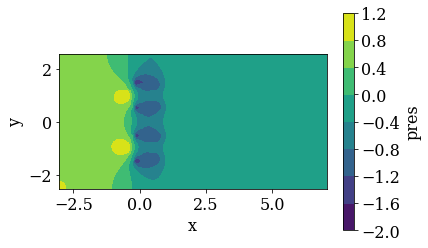

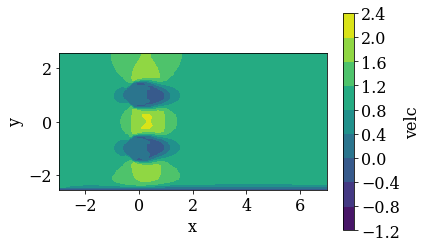

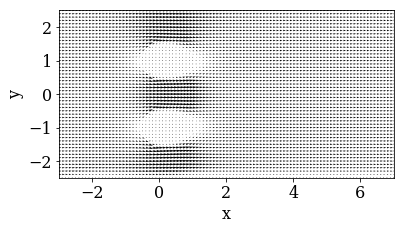

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8301031475989708e-12
Max, Min, U   : 2.020510379663732, -1.0
Max, Min, V   : 1.1179746371808037, -1.1214530383223285
Max, Min, P   : 1.2080313174077464, -1.8533204902776266
Max, Min, DIV : 3.552713678800501e-15, -5.329070518200751e-15


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9809289769766405e-12
Max, Min, U   : 2.020067312345467, -1.0
Max, Min, V   : 1.1183636908151982, -1.1217268700050627
Max, Min, P   : 0.9346152337358673, -2.1286067655259435
Max, Min, DIV : 3.552713678800501e-15, -5.329070518200751e-15


------------ Time = 1.0300000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8640824865493438e-12
Max, Min, U   : 2.019634216852899, -1.0
Max, Min, V   : 1.1187564350791264, -1.1220029379222949
Max, Min, P   : 1.1719376412498073, -1.8931581

------------ Time = 1.300000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.8962155348116146e-12
Max, Min, U   : 2.0202685080830696, -1.0
Max, Min, V   : 1.130455000186103, -1.1302809575447499
Max, Min, P   : 1.0910837226818588, -2.0233591065739636
Max, Min, DIV : 3.3306690738754696e-15, -3.469446951953614e-15


------------ Time = 1.310000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3676998510313492e-12
Max, Min, U   : 2.0209204069687323, -1.0
Max, Min, V   : 1.1308989428706715, -1.1305943849605953
Max, Min, P   : 0.8366555718079727, -2.2794902117809515
Max, Min, DIV : 3.9968028886505635e-15, -5.329070518200751e-15


------------ Time = 1.320000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3856157291053414e-12
Max, Min, U   : 2.021437062516938, -1.0
Max, Min, V   : 1.1313418335554744, -1.1309067287491534
Max, Min, P   : 0.8385408884801868, -2.2792929

------------ Time = 1.6100000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0021347466898486e-12
Max, Min, U   : 2.0210797211067284, -1.0
Max, Min, V   : 1.1432471302662257, -1.1390900086424793
Max, Min, P   : 1.0583407746424145, -2.0986812446893226
Max, Min, DIV : 3.1086244689504383e-15, -5.329070518200751e-15


------------ Time = 1.6200000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.992131755197109e-12
Max, Min, U   : 2.0210939520001516, -1.0
Max, Min, V   : 1.1436045706383844, -1.1393245065675817
Max, Min, P   : 1.0626682762148127, -2.0952779431623596
Max, Min, DIV : 3.427813588530171e-15, -4.135580766728708e-15


------------ Time = 1.6300000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9897187179405626e-12
Max, Min, U   : 2.0210043446486687, -1.0
Max, Min, V   : 1.1439571041900984, -1.1395546400015433
Max, Min, P   : 1.039326835776702, -2.11951

------------ Time = 1.8700000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9793884720640852e-12
Max, Min, U   : 2.011492249114757, -1.0
Max, Min, V   : 1.1508299036943908, -1.1436155983367562
Max, Min, P   : 1.1304081087412987, -2.038907792327469
Max, Min, DIV : 2.4424906541753444e-15, -2.7755575615628914e-15


------------ Time = 1.8800000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0384189724956113e-12
Max, Min, U   : 2.010916158356443, -1.0
Max, Min, V   : 1.1510462448343908, -1.1437169485726093
Max, Min, P   : 1.0919791192430197, -2.0772877598316537
Max, Min, DIV : 5.773159728050814e-15, -3.552713678800501e-15


------------ Time = 1.8900000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0253081551952938e-12
Max, Min, U   : 2.0102975173371602, -1.0
Max, Min, V   : 1.1512565615592005, -1.1438121288975427
Max, Min, P   : 1.3759247791337614, -1.79325

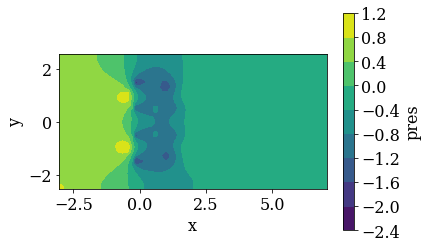

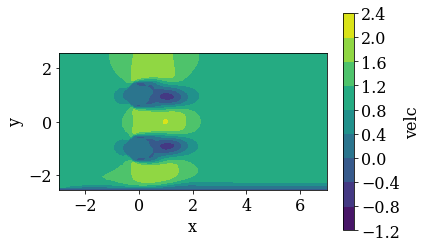

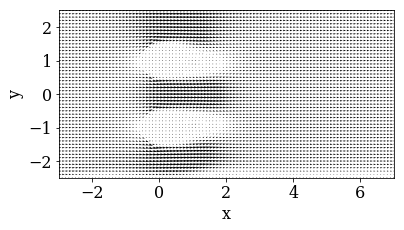

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0292026775992784e-12
Max, Min, U   : 2.0022982717572226, -1.0
Max, Min, V   : 1.1532902786521584, -1.14443767831861
Max, Min, P   : 1.0843553834595423, -2.080515319523082
Max, Min, DIV : 3.552713678800501e-15, -3.552713678800501e-15


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1774080925155626e-12
Max, Min, U   : 2.0014174725308016, -1.0
Max, Min, V   : 1.1534175743326542, -1.1444441671017138
Max, Min, P   : 1.0585988708080523, -2.1056415238113755
Max, Min, DIV : 4.052314039881821e-15, -3.1086244689504383e-15


------------ Time = 2.0300000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0672922904967985e-12
Max, Min, U   : 2.0004618377738534, -1.0
Max, Min, V   : 1.1535382368857503, -1.144443309017502
Max, Min, P   : 1.0635007506090517, -2.100067471

------------ Time = 2.289999999999995 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.283976066773703e-12
Max, Min, U   : 1.9644050051228934, -1.0
Max, Min, V   : 1.1543080668296963, -1.1417411232918642
Max, Min, P   : 0.9863250866699784, -2.1454883166146477
Max, Min, DIV : 4.440892098500626e-15, -2.454633718507182e-15


------------ Time = 2.299999999999995 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.245682394342463e-12
Max, Min, U   : 1.962608347238593, -1.0
Max, Min, V   : 1.1542451184358795, -1.1415331712037469
Max, Min, P   : 0.9748242825178466, -2.1552458774756147
Max, Min, DIV : 3.3653635433950058e-15, -3.885780586188048e-15


------------ Time = 2.3099999999999947 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.038687153367897e-12
Max, Min, U   : 1.9607580926083594, -1.0
Max, Min, V   : 1.1541751762211716, -1.1413176857979797
Max, Min, P   : 1.1911564711621991, -1.937134560

------------ Time = 2.5499999999999896 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0603080772795537e-12
Max, Min, U   : 1.9616186335605779, -1.0
Max, Min, V   : 1.150361145665477, -1.1341017300980958
Max, Min, P   : 1.2192131981900398, -1.8567795638701083
Max, Min, DIV : 3.552713678800501e-15, -2.7755575615628914e-15


------------ Time = 2.5599999999999894 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1318529633868937e-12
Max, Min, U   : 1.962021225257741, -1.0
Max, Min, V   : 1.1501122549973615, -1.1337288719445993
Max, Min, P   : 1.2253149589290453, -1.8481560241236137
Max, Min, DIV : 3.774758283725532e-15, -2.886579864025407e-15


------------ Time = 2.569999999999989 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1636685736090625e-12
Max, Min, U   : 1.9624026414492528, -1.0
Max, Min, V   : 1.1498561723071117, -1.1333515733165074
Max, Min, P   : 1.2706795070359185, -1.800247

------------ Time = 2.819999999999984 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1883961097079775e-12
Max, Min, U   : 1.9838724646905261, -1.0
Max, Min, V   : 1.1412331836548142, -1.1230511231743385
Max, Min, P   : 1.115099709960794, -1.8871901992717528
Max, Min, DIV : 3.885780586188048e-15, -3.552713678800501e-15


------------ Time = 2.8299999999999836 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.131745649809312e-12
Max, Min, U   : 1.9848605144331968, -1.0
Max, Min, V   : 1.1408076631965864, -1.1226281136477994
Max, Min, P   : 1.1131287490509574, -1.8863080599404416
Max, Min, DIV : 3.3306690738754696e-15, -2.706168622523819e-15


------------ Time = 2.8399999999999834 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.106602422110271e-12
Max, Min, U   : 1.9858102166114577, -1.0
Max, Min, V   : 1.140376876147078, -1.122206045294115
Max, Min, P   : 1.1291108912599432, -1.867472241

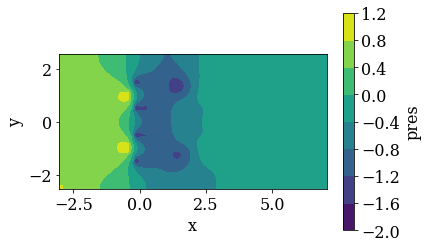

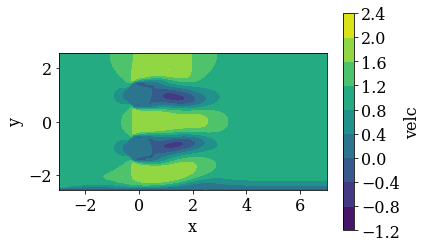

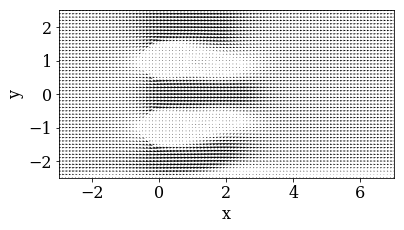

------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2625886885360708e-12
Max, Min, U   : 2.0013140495604262, -1.0
Max, Min, V   : 1.1323993683051001, -1.1153409513009216
Max, Min, P   : 1.072398750833566, -1.876465554772696
Max, Min, DIV : 2.886579864025407e-15, -3.774758283725532e-15


------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.274649588846765e-12
Max, Min, U   : 2.002059173445059, -1.0
Max, Min, V   : 1.131901726965845, -1.1149640871515039
Max, Min, P   : 1.0706102608493127, -1.8755461377343874
Max, Min, DIV : 3.9968028886505635e-15, -3.552713678800501e-15


------------ Time = 3.0299999999999794 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.279461096018846e-12
Max, Min, U   : 2.002762210788551, -1.0
Max, Min, V   : 1.131402166207282, -1.1145910655068374
Max, Min, P   : 1.0663089000859696, -1.8771564283854

------------ Time = 3.289999999999974 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.308809880389794e-12
Max, Min, U   : 2.021553958976815, -1.0
Max, Min, V   : 1.1184405208622419, -1.1065416699553894
Max, Min, P   : 1.0786701350475478, -1.8380689212612347
Max, Min, DIV : 4.163336342344337e-15, -3.1086244689504383e-15


------------ Time = 3.2999999999999736 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2728422906886172e-12
Max, Min, U   : 2.022073453046143, -1.0
Max, Min, V   : 1.117969764523892, -1.106304284193211
Max, Min, P   : 1.0874783791051983, -1.8311288545458453
Max, Min, DIV : 3.3306690738754696e-15, -3.552713678800501e-15


------------ Time = 3.3099999999999734 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3103828951607347e-12
Max, Min, U   : 2.02253386795613, -1.0
Max, Min, V   : 1.1175029500598506, -1.1060727352300936
Max, Min, P   : 1.0845121797101944, -1.8359250645

------------ Time = 3.569999999999968 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.330553307583108e-12
Max, Min, U   : 2.0368046516497422, -1.0
Max, Min, V   : 1.1072821775132957, -1.1022142038004343
Max, Min, P   : 1.1134307094207962, -1.839399898755813
Max, Min, DIV : 3.684552662974738e-15, -3.747002708109903e-15


------------ Time = 3.5799999999999677 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.278652844958874e-12
Max, Min, U   : 2.038040473875638, -1.0
Max, Min, V   : 1.1069799534989846, -1.1021526799681525
Max, Min, P   : 1.1210796484795718, -1.832357402759781
Max, Min, DIV : 4.85722573273506e-15, -4.093947403305265e-15


------------ Time = 3.5899999999999674 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.31246955756955e-12
Max, Min, U   : 2.0392637759292387, -1.0
Max, Min, V   : 1.1066854879836694, -1.102097826818095
Max, Min, P   : 1.1107488198279165, -1.84324420633557

------------ Time = 3.839999999999962 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.663854906090986e-12
Max, Min, U   : 2.0708748233039844, -1.0
Max, Min, V   : 1.1068732793903435, -1.1029303963705708
Max, Min, P   : 1.0052319931821958, -1.945869941857128
Max, Min, DIV : 4.6629367034256575e-15, -5.828670879282072e-15


------------ Time = 3.849999999999962 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3418111190203727e-12
Max, Min, U   : 2.072221068695698, -1.0
Max, Min, V   : 1.1069119718729075, -1.103051989227573
Max, Min, P   : 1.2210795228579268, -1.7292326726531544
Max, Min, DIV : 4.0245584642661925e-15, -3.5388358909926865e-15


------------ Time = 3.8599999999999617 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2597493931516994e-12
Max, Min, U   : 2.0735419866105995, -1.0
Max, Min, V   : 1.1069398956784369, -1.103180260962167
Max, Min, P   : 1.240063046157971, -1.709408415

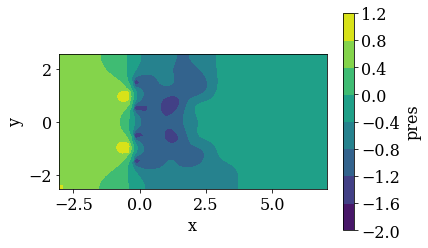

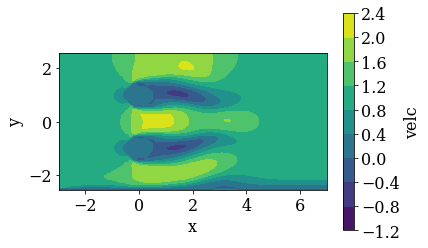

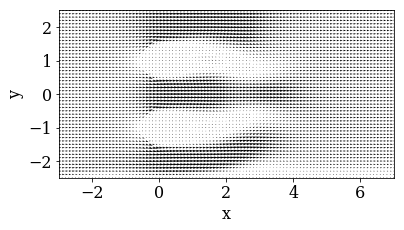

------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4489500378014427e-12
Max, Min, U   : 2.0947681162485976, -1.0
Max, Min, V   : 1.106055325470955, -1.1058802551410152
Max, Min, P   : 1.0752254130859804, -1.8557071737688966
Max, Min, DIV : 3.608224830031759e-15, -4.0245584642661925e-15


------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2835125294987067e-12
Max, Min, U   : 2.09655748204217, -1.0
Max, Min, V   : 1.105909342118637, -1.1061097355959433
Max, Min, P   : 1.3109147657740428, -1.6184032294092732
Max, Min, DIV : 3.816391647148976e-15, -4.718447854656915e-15


------------ Time = 4.0299999999999585 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.311192599108631e-12
Max, Min, U   : 2.09832811966077, -1.0
Max, Min, V   : 1.105752552516046, -1.106345051135575
Max, Min, P   : 1.3281943559736833, -1.59946425222988

------------ Time = 4.239999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.438957107689327e-12
Max, Min, U   : 2.132665536983359, -1.0
Max, Min, V   : 1.1061353111231986, -1.112480371779666
Max, Min, P   : 1.337015341345976, -1.5931206733166654
Max, Min, DIV : 5.995204332975845e-15, -4.6351811278100286e-15


------------ Time = 4.249999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4253742829447966e-12
Max, Min, U   : 2.1340716163545244, -1.0
Max, Min, V   : 1.1064114182588394, -1.1128207676045938
Max, Min, P   : 1.1140773745122243, -1.8182199683638063
Max, Min, DIV : 4.107825191113079e-15, -5.329070518200751e-15


------------ Time = 4.259999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.44989478137439e-12
Max, Min, U   : 2.1354805605052385, -1.0
Max, Min, V   : 1.1066951654397506, -1.113164659791201
Max, Min, P   : 1.112747350465066, -1.82171459216012

------------ Time = 4.549999999999947 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.314262865278655e-12
Max, Min, U   : 2.184470146175773, -1.0
Max, Min, V   : 1.1177768686692784, -1.1240311327065016
Max, Min, P   : 1.414048955813157, -1.5914639019495778
Max, Min, DIV : 4.440892098500626e-15, -5.051514762044462e-15


------------ Time = 4.559999999999947 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.268295450014189e-12
Max, Min, U   : 2.1862824580431326, -1.0
Max, Min, V   : 1.118238323713665, -1.12441350383478
Max, Min, P   : 1.3991206959123024, -1.6094532987364416
Max, Min, DIV : 3.191891195797325e-15, -4.496403249731884e-15


------------ Time = 4.569999999999947 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.381981853800594e-12
Max, Min, U   : 2.1880060679378297, -1.0
Max, Min, V   : 1.1187036276491993, -1.124794775380427
Max, Min, P   : 1.3798743557994402, -1.6317624700334281

------------ Time = 4.869999999999941 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3364736400100163e-12
Max, Min, U   : 2.2290104538959565, -1.0
Max, Min, V   : 1.133649547056637, -1.1349477851407035
Max, Min, P   : 1.1455643165207947, -1.9536435626690278
Max, Min, DIV : 4.107825191113079e-15, -4.3021142204224816e-15


------------ Time = 4.87999999999994 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.46176104926403e-12
Max, Min, U   : 2.229778682191403, -1.0
Max, Min, V   : 1.1341527451816535, -1.1352186753739526
Max, Min, P   : 1.1339643641304529, -1.9678503554956472
Max, Min, DIV : 4.579669976578771e-15, -3.9968028886505635e-15


------------ Time = 4.88999999999994 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4496478312622586e-12
Max, Min, U   : 2.2304279377973, -1.0
Max, Min, V   : 1.1346544278775124, -1.1354837218586642
Max, Min, P   : 1.1236909776277688, -1.98069991670658

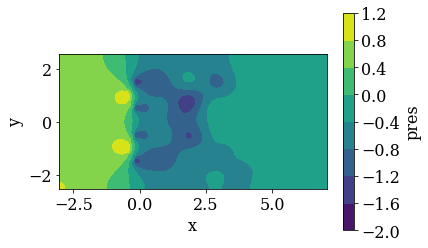

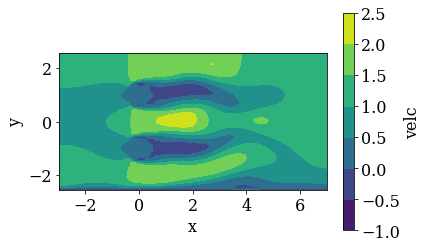

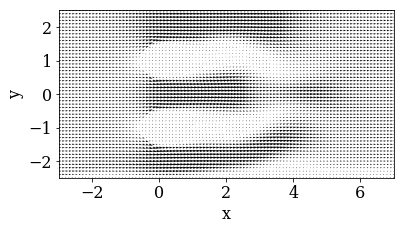

------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3442891519100834e-12
Max, Min, U   : 2.242859142483131, -1.0
Max, Min, V   : 1.1404940947799724, -1.1381647817020617
Max, Min, P   : 1.4142325692654674, -1.7183513388614928
Max, Min, DIV : 4.163336342344337e-15, -3.885780586188048e-15


------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.289335499843903e-12
Max, Min, U   : 2.2435864685374782, -1.0
Max, Min, V   : 1.1409605713951547, -1.1383431930438042
Max, Min, P   : 1.4097168140455565, -1.7249635912126822
Max, Min, DIV : 4.274358644806853e-15, -4.274358644806853e-15


------------ Time = 5.029999999999937 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3241166171451964e-12
Max, Min, U   : 2.245130279557921, -1.0
Max, Min, V   : 1.1414231737673444, -1.1385142008152156
Max, Min, P   : 1.3935340349768637, -1.7432001482

------------ Time = 5.339999999999931 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.397018875109507e-12
Max, Min, U   : 2.2654618637185164, -1.0
Max, Min, V   : 1.1530280754932225, -1.1397539146537286
Max, Min, P   : 1.2155515909502919, -1.9601750595427359
Max, Min, DIV : 3.885780586188048e-15, -5.551115123125783e-15


------------ Time = 5.34999999999993 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3736791497811057e-12
Max, Min, U   : 2.266086028299708, -1.0
Max, Min, V   : 1.153290921352282, -1.1396549567738563
Max, Min, P   : 1.1812765324513828, -1.9948274879846362
Max, Min, DIV : 3.885780586188048e-15, -3.608224830031759e-15


------------ Time = 5.35999999999993 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2964164883380483e-12
Max, Min, U   : 2.267297581855396, -1.0
Max, Min, V   : 1.1535455698489805, -1.1395471254364504
Max, Min, P   : 1.2319272898590738, -1.9444957097547

------------ Time = 5.679999999999923 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2986161448882003e-12
Max, Min, U   : 2.27859019372063, -1.0
Max, Min, V   : 1.156991501460437, -1.1316453384283167
Max, Min, P   : 1.3654532709042666, -1.7907148136557578
Max, Min, DIV : 3.7192471324942744e-15, -3.3306690738754696e-15


------------ Time = 5.689999999999923 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3105970255170406e-12
Max, Min, U   : 2.2791958061909856, -1.0
Max, Min, V   : 1.1569461661492484, -1.1312723080651055
Max, Min, P   : 1.3517762106046534, -1.802856407621411
Max, Min, DIV : 3.4416913763379853e-15, -3.608224830031759e-15


------------ Time = 5.699999999999923 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3583564483033573e-12
Max, Min, U   : 2.2795806131673175, -1.0
Max, Min, V   : 1.1568915448114658, -1.1308927585207846
Max, Min, P   : 1.1505340623550488, -2.00251364

------------ Time = 5.919999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.458941681928189e-12
Max, Min, U   : 2.2827020236459816, -1.0
Max, Min, V   : 1.1534412238604137, -1.121181418267191
Max, Min, P   : 1.1284318036232066, -1.978768131255947
Max, Min, DIV : 3.3306690738754696e-15, -4.107825191113079e-15


------------ Time = 5.929999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.276538014887553e-12
Max, Min, U   : 2.2821959145390682, -1.0
Max, Min, V   : 1.153188787773397, -1.1206927371248343
Max, Min, P   : 1.3576798091788806, -1.7470171702908437
Max, Min, DIV : 3.552713678800501e-15, -4.232725281383409e-15


------------ Time = 5.939999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.432760965736319e-12
Max, Min, U   : 2.281445956597639, -1.0
Max, Min, V   : 1.1529287840048679, -1.1202013368870793
Max, Min, P   : 1.125166339673932, -1.97699905456474

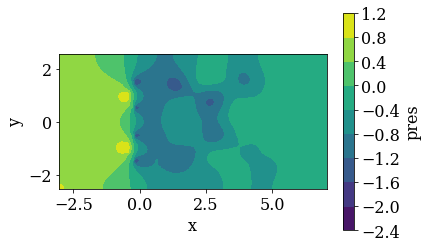

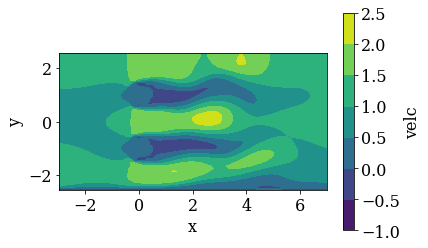

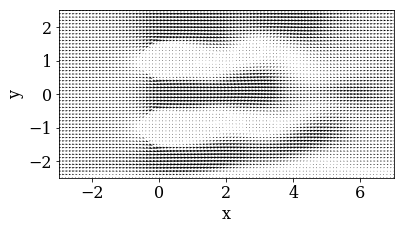

------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.480127245043161e-12
Max, Min, U   : 2.284232290486004, -1.0
Max, Min, V   : 1.1509068022174687, -1.1167013010106785
Max, Min, P   : 1.1013903153550542, -1.982343728362434
Max, Min, DIV : 3.608224830031759e-15, -3.6637359812630166e-15


------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4554126893680382e-12
Max, Min, U   : 2.2838248802347394, -1.0
Max, Min, V   : 1.1505906074622825, -1.116195009846006
Max, Min, P   : 1.094732499823968, -1.9862804463325539
Max, Min, DIV : 3.552713678800501e-15, -4.9960036108132044e-15


------------ Time = 6.029999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4436453069597508e-12
Max, Min, U   : 2.2831611662466216, -1.0
Max, Min, V   : 1.1502679772640887, -1.115687737512703
Max, Min, P   : 1.0815259702725397, -1.99674730460

------------ Time = 6.31999999999991 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5371260029816632e-12
Max, Min, U   : 2.2869030176661287, -1.0
Max, Min, V   : 1.1388196928880983, -1.1014682025865359
Max, Min, P   : 1.0733385202440522, -1.9228779479869633
Max, Min, DIV : 5.329070518200751e-15, -3.6637359812630166e-15


------------ Time = 6.3299999999999095 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3180292265204334e-12
Max, Min, U   : 2.2882661836682883, -1.0
Max, Min, V   : 1.1383797783173615, -1.1010266148480619
Max, Min, P   : 1.3210572573924217, -1.672432904881242
Max, Min, DIV : 3.712308238590367e-15, -3.552713678800501e-15


------------ Time = 6.339999999999909 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.65214175518765e-12
Max, Min, U   : 2.289326857576682, -1.0
Max, Min, V   : 1.1379387908468017, -1.1005903554663259
Max, Min, P   : 1.0623012806982566, -1.9284823216

------------ Time = 6.649999999999903 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4552674108789845e-12
Max, Min, U   : 2.2954054053108512, -1.0
Max, Min, V   : 1.124816293124088, -1.0906650893221561
Max, Min, P   : 1.106765800229752, -1.8186068271413076
Max, Min, DIV : 3.858025010572419e-15, -5.412337245047638e-15


------------ Time = 6.659999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4491493285329622e-12
Max, Min, U   : 2.294733013883804, -1.0
Max, Min, V   : 1.1244448897987136, -1.090487626161403
Max, Min, P   : 1.1105407356798622, -1.8157654293857823
Max, Min, DIV : 3.774758283725532e-15, -4.218847493575595e-15


------------ Time = 6.669999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.493225716235619e-12
Max, Min, U   : 2.2937018711948327, -1.0
Max, Min, V   : 1.1240787699125034, -1.0903204279277197
Max, Min, P   : 1.1255121009119646, -1.801666275477

------------ Time = 6.879999999999898 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5044318658232946e-12
Max, Min, U   : 2.296507669300684, -1.0
Max, Min, V   : 1.1178904894461839, -1.089297108675909
Max, Min, P   : 1.1212443806688128, -1.8094756043577604
Max, Min, DIV : 4.884981308350689e-15, -4.7791631763161035e-15


------------ Time = 6.8899999999998975 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4199383514255425e-12
Max, Min, U   : 2.296734808601099, -1.0
Max, Min, V   : 1.1176791089472693, -1.0893699660724259
Max, Min, P   : 1.144658339544235, -1.7855130270352897
Max, Min, DIV : 3.885780586188048e-15, -3.9968028886505635e-15


------------ Time = 6.899999999999897 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.340135486388348e-12
Max, Min, U   : 2.2965605155468194, -1.0
Max, Min, V   : 1.1174762319785003, -1.0894539294594154
Max, Min, P   : 1.3716957214255219, -1.557861991

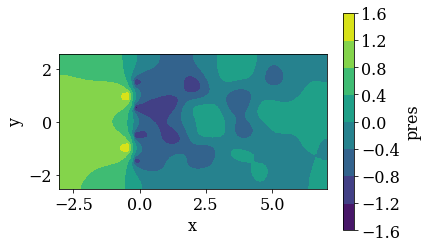

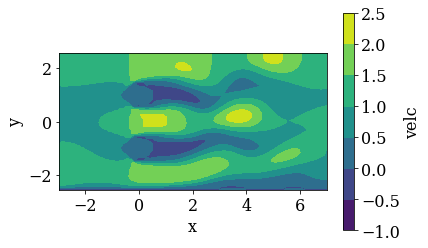

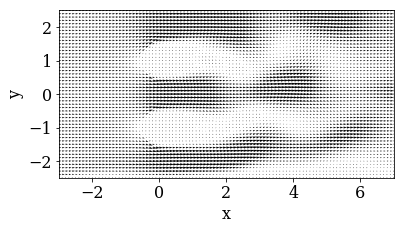

------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3429535935097174e-12
Max, Min, U   : 2.292107939174714, -1.0
Max, Min, V   : 1.115831899057362, -1.0910998347601457
Max, Min, P   : 1.3394693223925302, -1.5791271991775877
Max, Min, DIV : 3.608224830031759e-15, -4.718447854656915e-15


------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.366586616019571e-12
Max, Min, U   : 2.290324165840516, -1.0
Max, Min, V   : 1.115737829033021, -1.0913136753011263
Max, Min, P   : 1.3536705868097303, -1.5635567753519184
Max, Min, DIV : 3.83026943495679e-15, -3.885780586188048e-15


------------ Time = 7.0299999999998946 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.498188719618175e-12
Max, Min, U   : 2.2911305500048957, -1.0
Max, Min, V   : 1.1156532725593613, -1.0915378964470608
Max, Min, P   : 1.1157363134183695, -1.8000619088852

------------ Time = 7.299999999999889 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3726093889666603e-12
Max, Min, U   : 2.3061924687019264, -1.0
Max, Min, V   : 1.1170516986490011, -1.1010633624186925
Max, Min, P   : 1.2095766361330131, -1.7381801601515914
Max, Min, DIV : 3.885780586188048e-15, -3.774758283725532e-15


------------ Time = 7.309999999999889 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4562809405897686e-12
Max, Min, U   : 2.305660875646524, -1.0
Max, Min, V   : 1.1172387598051485, -1.1015234583063949
Max, Min, P   : 1.1870890152621212, -1.7629351608660322
Max, Min, DIV : 4.163336342344337e-15, -4.107825191113079e-15


------------ Time = 7.319999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.485908761049363e-12
Max, Min, U   : 2.3046079989647836, -1.0
Max, Min, V   : 1.1174350993889286, -1.1019894156998025
Max, Min, P   : 1.1634029088030982, -1.788934557

------------ Time = 7.589999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.413116558918861e-12
Max, Min, U   : 2.301892668284075, -1.0
Max, Min, V   : 1.1258851298587043, -1.1159696021612493
Max, Min, P   : 1.16123366265087, -1.8669252560000982
Max, Min, DIV : 4.0245584642661925e-15, -3.885780586188048e-15


------------ Time = 7.599999999999882 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.564720121648487e-12
Max, Min, U   : 2.3025949027145, -1.0
Max, Min, V   : 1.1262974846392004, -1.116507693273301
Max, Min, P   : 1.1634371977377138, -1.8678582485901463
Max, Min, DIV : 4.163336342344337e-15, -5.551115123125783e-15


------------ Time = 7.609999999999882 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.512236697377265e-12
Max, Min, U   : 2.3027397462145833, -1.0
Max, Min, V   : 1.126715447710434, -1.1170449418096267
Max, Min, P   : 1.1728808796607397, -1.8615617043163444


------------ Time = 7.909999999999876 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3807644483602326e-12
Max, Min, U   : 2.3141201664816924, -1.0
Max, Min, V   : 1.1409037000162892, -1.1316343220966003
Max, Min, P   : 1.220231783354426, -1.9067450453052857
Max, Min, DIV : 3.885780586188048e-15, -4.440892098500626e-15


------------ Time = 7.919999999999876 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3901560489164933e-12
Max, Min, U   : 2.3197103537263435, -1.0
Max, Min, V   : 1.1413975877782592, -1.132033930274313
Max, Min, P   : 1.2272921097126632, -1.9024837708083067
Max, Min, DIV : 3.608224830031759e-15, -5.10702591327572e-15


------------ Time = 7.929999999999875 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.403344675783651e-12
Max, Min, U   : 2.3248155497825875, -1.0
Max, Min, V   : 1.1418905516999323, -1.1324258228389577
Max, Min, P   : 1.1901578801965984, -1.94238467690

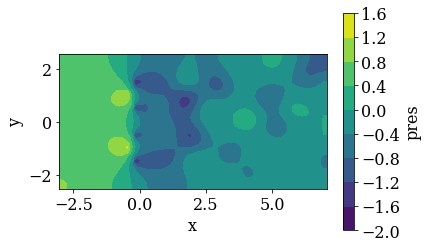

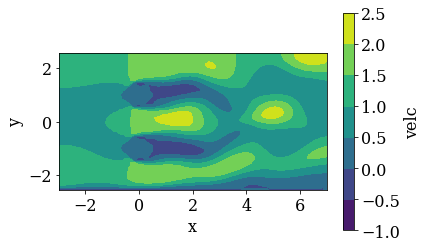

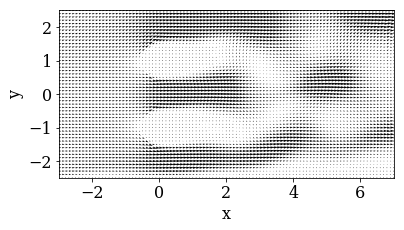

------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3609747527753025e-12
Max, Min, U   : 2.3638123395334816, -1.0
Max, Min, V   : 1.145775147629496, -1.1352627284551977
Max, Min, P   : 1.2454843581794877, -1.907876770991707
Max, Min, DIV : 3.6637359812630166e-15, -3.608224830031759e-15


------------ Time = 8.019999999999873 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3825178579602605e-12
Max, Min, U   : 2.3717685358232607, -1.0
Max, Min, V   : 1.146250117804879, -1.1355776497586558
Max, Min, P   : 1.2155095841539456, -1.9402712452933648
Max, Min, DIV : 4.163336342344337e-15, -4.9960036108132044e-15


------------ Time = 8.029999999999873 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.379816109399273e-12
Max, Min, U   : 2.3792105282005824, -1.0
Max, Min, V   : 1.146722022581006, -1.1358832488713861
Max, Min, P   : 1.2255558494276395, -1.9326001437

------------ Time = 8.309999999999867 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.310107799672425e-12
Max, Min, U   : 2.553482089812233, -1.0
Max, Min, V   : 1.1578774551345914, -1.1402062578261383
Max, Min, P   : 1.3022861508037211, -1.9002402751784082
Max, Min, DIV : 3.885780586188048e-15, -4.107825191113079e-15


------------ Time = 8.319999999999867 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2715712748473203e-12
Max, Min, U   : 2.549672808893516, -1.0
Max, Min, V   : 1.1581756841742081, -1.1401984163492336
Max, Min, P   : 1.275512836147505, -1.927695233110612
Max, Min, DIV : 3.802513859341161e-15, -5.828670879282072e-15


------------ Time = 8.329999999999867 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6110972378972705e-12
Max, Min, U   : 2.54474214931081, -1.0
Max, Min, V   : 1.1584653831080787, -1.1401789747810873
Max, Min, P   : 1.0335569081650477, -2.17026538578602

------------ Time = 8.62999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2346860455535276e-12
Max, Min, U   : 2.2595157366616516, -1.0
Max, Min, V   : 1.1626779146587056, -1.134333255881748
Max, Min, P   : 1.309327636379252, -1.8814106209389352
Max, Min, DIV : 3.885780586188048e-15, -3.885780586188048e-15


------------ Time = 8.63999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2560070636036622e-12
Max, Min, U   : 2.260628329964981, -1.0
Max, Min, V   : 1.1626581352797554, -1.133973674395171
Max, Min, P   : 1.3145092356220895, -1.874773780893305
Max, Min, DIV : 3.885780586188048e-15, -3.3306690738754696e-15


------------ Time = 8.64999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.300355041077448e-12
Max, Min, U   : 2.2614540878286644, -1.0
Max, Min, V   : 1.1626277210693767, -1.1349962510959433
Max, Min, P   : 1.2907217072675978, -1.897044673999280

------------ Time = 8.959999999999853 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.324056743988308e-12
Max, Min, U   : 2.2740159484131377, -1.0
Max, Min, V   : 1.5265522804660872, -1.5265522804660872
Max, Min, P   : 1.5854665438460522, -1.7602085088184791
Max, Min, DIV : 3.219646771412954e-15, -3.635980405647388e-15


------------ Time = 8.969999999999853 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.318651047397311e-12
Max, Min, U   : 2.273672848215978, -1.0
Max, Min, V   : 1.5296275946161906, -1.5296275946161906
Max, Min, P   : 1.5656881242669771, -1.7708890541824576
Max, Min, DIV : 3.885780586188048e-15, -4.440892098500626e-15


------------ Time = 8.979999999999853 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.563541693485389e-12
Max, Min, U   : 2.273007631375033, -1.0
Max, Min, V   : 1.532897375891024, -1.532897375891024
Max, Min, P   : 1.2983559363488688, -2.02814603032552

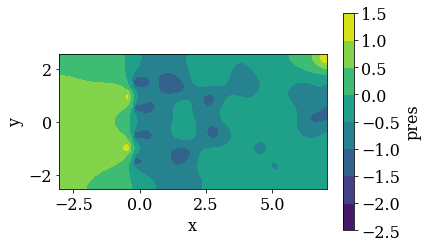

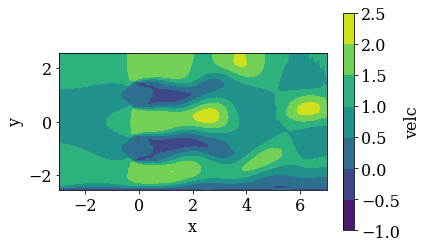

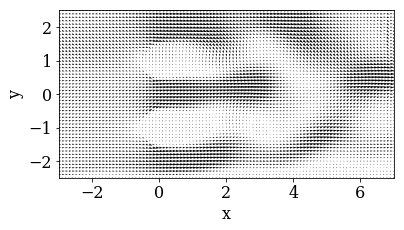

------------ Time = 9.009999999999852 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.479485331295689e-12
Max, Min, U   : 2.274928364558083, -1.0
Max, Min, V   : 1.5450095644125232, -1.5450095644125232
Max, Min, P   : 1.311221478386255, -1.9798050997079066
Max, Min, DIV : 4.440892098500626e-15, -3.885780586188048e-15


------------ Time = 9.019999999999852 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.446287329420896e-12
Max, Min, U   : 2.2759985899649484, -1.0
Max, Min, V   : 1.5472261320653444, -1.5472261320653444
Max, Min, P   : 1.2849269477614385, -1.9927252408087077
Max, Min, DIV : 4.107825191113079e-15, -3.9968028886505635e-15


------------ Time = 9.029999999999852 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4920239042509033e-12
Max, Min, U   : 2.27672911192133, -1.0
Max, Min, V   : 1.5485022710500882, -1.5485022710500882
Max, Min, P   : 1.2810620845696552, -1.982538835683

------------ Time = 9.319999999999846 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5589018993076004e-12
Max, Min, U   : 2.483550856387921, -1.0
Max, Min, V   : 1.2850637335499402, -1.2850637335499402
Max, Min, P   : 1.1029192645524328, -1.8900842811541034
Max, Min, DIV : 4.440892098500626e-15, -5.329070518200751e-15


------------ Time = 9.329999999999846 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5185744063086367e-12
Max, Min, U   : 2.4840365553820765, -1.0
Max, Min, V   : 1.269682075964113, -1.269682075964113
Max, Min, P   : 1.1038298923405918, -1.8857940709750145
Max, Min, DIV : 4.440892098500626e-15, -5.10702591327572e-15


------------ Time = 9.339999999999845 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5046169250580966e-12
Max, Min, U   : 2.483473416857969, -1.0
Max, Min, V   : 1.253459571846186, -1.253459571846186
Max, Min, P   : 1.1009716551268416, -1.88529895835821

------------ Time = 9.57999999999984 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.495331472045578e-12
Max, Min, U   : 2.3947755836385416, -1.0
Max, Min, V   : 1.5248651302927423, -1.5248651302927423
Max, Min, P   : 1.097056001591999, -1.862355104814879
Max, Min, DIV : 4.440892098500626e-15, -3.552713678800501e-15


------------ Time = 9.58999999999984 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5300632523237613e-12
Max, Min, U   : 2.387229793456549, -1.0
Max, Min, V   : 1.5401008064519144, -1.5401008064519144
Max, Min, P   : 1.083830639479761, -1.8772348746671625
Max, Min, DIV : 6.661338147750939e-15, -3.552713678800501e-15


------------ Time = 9.59999999999984 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3233854670798976e-12
Max, Min, U   : 2.3791282664909823, -1.0
Max, Min, V   : 1.5533735866719807, -1.5533735866719807
Max, Min, P   : 1.3161349333182903, -1.646515671494913

------------ Time = 9.879999999999834 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.308374442296156e-12
Max, Min, U   : 2.2971512801404432, -1.0
Max, Min, V   : 1.4621214703155911, -1.4621214703155911
Max, Min, P   : 1.3929031895683226, -1.5836791643857533
Max, Min, DIV : 3.774758283725532e-15, -6.661338147750939e-15


------------ Time = 9.889999999999834 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.453377049898518e-12
Max, Min, U   : 2.2990808958480615, -1.0
Max, Min, V   : 1.4458032246092405, -1.4458032246092405
Max, Min, P   : 1.1661466645139087, -1.8098035991699841
Max, Min, DIV : 3.747002708109903e-15, -4.440892098500626e-15


------------ Time = 9.899999999999833 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.410058321351775e-12
Max, Min, U   : 2.3004916454444477, -1.0
Max, Min, V   : 1.4283181029145728, -1.4283181029145728
Max, Min, P   : 1.1667760485146483, -1.8084641785

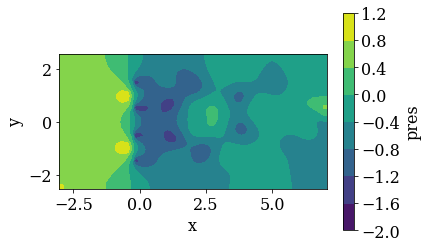

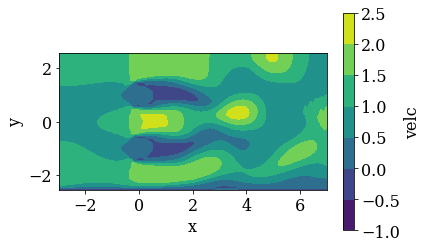

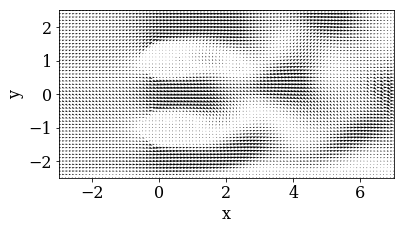

------------ Time = 10.009999999999831 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4184621043400363e-12
Max, Min, U   : 2.3058325542882985, -1.0
Max, Min, V   : 1.1841000151956196, -1.1841000151956196
Max, Min, P   : 1.132507956936311, -1.8298827188506437
Max, Min, DIV : 4.3021142204224816e-15, -4.3021142204224816e-15




In [4]:
imbound.map_to_grid()

while scalars.time <= scalars.tmax:
    
    ins.advance()
    scalars.advance()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        flowx.io.display_stats(scalars)  
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')           

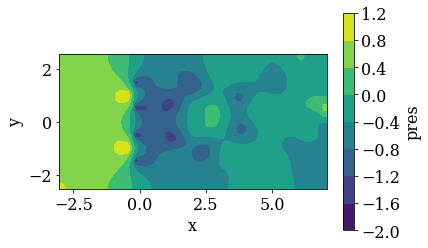

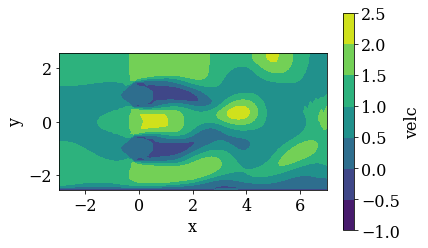

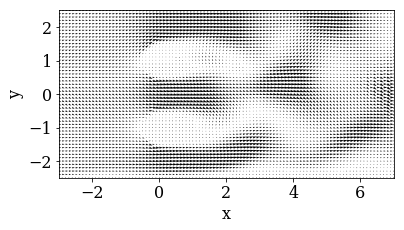

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_vector(gridx,gridy,'velc')